<a href="https://colab.research.google.com/github/GrtSid/midasIIITD/blob/master/cv_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imported drive library to access dataset from google drive. Added the dataset to my drive and hence fetched the data from there.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Change the path to the location where dataset is stored.

In [0]:
root_path = 'drive/My Drive/Vision_task_dataset_public/'

importing necessary libraries:
1.   Pickle : to open the images stored in .pkl format.
2.   matplotlib : to be able to plot the image in the dataset.
1.   Numpy: for Mathematcial computation on dataset
1.   CSV :  to write the predicted values in tabular format





In [0]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import csv

Changed the location of current directory to the location of dataset.

In [4]:
cd drive/My Drive/Vision_task_dataset_public/

/content/drive/My Drive/Vision_task_dataset_public


Loading the dataset using pickle library and file handling.

In [0]:
with open('train_image.pkl', 'rb') as f:
    data = pickle.load(f)
with open('train_label.pkl', 'rb') as a:
    data1 = pickle.load(a)    
with open('test_image.pkl', 'rb') as b:
    data2 = pickle.load(b)        

Storing the data in the form of array using numpy so that computations could be easily performed on the dataset.
using matplotlib to view a sample image of the dataset.

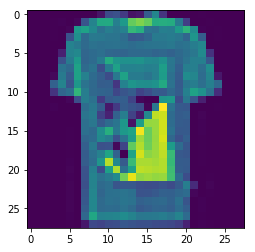

In [6]:

data= np.array(data)
data2=np.array(data2)
data1=np.array(data1)
plt.imshow(data[50].reshape(28,28))

Using shape function from numpy library to determine the shape of the dataset array.

In [7]:
print (data.shape)
print (data1.shape)
print (data2.shape)

(8000, 784)
(8000,)
(2000, 784)


Reshaped the data inputs. The first number is the number of images (8000 for data and 2000 for data2). Then comes the shape of each image (28x28). The last number is 1, which signifies that the images are greyscale.
Imported the keras library functions to create our model.

---

Sequential is the easiest way to build a model in Keras. It allows you to build a model layer by layer. So I imported Sequential model from keras and thus build a model layer by layer.


In [8]:
data = data.reshape(8000,28,28,1)
data2 = data2.reshape(2000,28,28,1)
data1=np.array(data1)
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout
from keras.layers.normalization import BatchNormalization
data1 = to_categorical(data1)
print (data1)


Using TensorFlow backend.


[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


Created a CNN Model using relu and softmax activation function. 

---

The first 2 layers are Conv2D layers. These are convolution layers that will deal with our input images, which are seen as 2-dimensional matrices. In between the Conv2D layers and the dense layer, there is a ‘Flatten’ layer. Flatten serves as a connection between the convolution and dense layer.The activation function used in dense layer is ‘softmax’. Softmax makes the output sum up to 1 so the output can be interpreted as probabilities. The model will then make its prediction based on which option has the highest probability.
Droupout function is added to eliminate the overfitting of the model on the training data. Used Batch normalization function to normalize the inputs of each layer, in order to fight the internal covariate shift problem.

In [9]:
model = Sequential()
model.add(Conv2D(512, kernel_size=3, activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Compiling of the model takes place. The first argument "adam" controls the learning rate throughout the training. Second argument ‘categorical_crossentropy’ for loss function. A lower score indicates that the model is performing better.  To be able to interpret the model easily used the accuracy metric as the third argument.

In [0]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Now, trained the model using fit() function with epoch =4 and batch_size = 50 to achieve better accuracy on the dataset.

In [13]:
model.fit(data, data1, epochs=4, batch_size=50)

Epoch 1/4
8000/8000 [==============================] - 1158s 145ms/step - loss: 0.9864 - acc: 0.6883
Epoch 2/4
8000/8000 [==============================] - 1150s 144ms/step - loss: 0.7544 - acc: 0.7622
Epoch 3/4
8000/8000 [==============================] - 1151s 144ms/step - loss: 0.6568 - acc: 0.7965
Epoch 4/4
8000/8000 [==============================] - 1149s 144ms/step - loss: 0.5870 - acc: 0.8149


Predicted the output base on the model fit above i.e. classified the test images into different categories or provided them the labels.

In [14]:
predicted=model.predict_classes(data2,verbose=1)
print (predicted)

2000/2000 [==============================] - 76s 38ms/step
[0 0 0 ... 6 6 6]


The values predicted are represented in the tabular format in the file name "siddhant_agarwal.csv".

In [0]:
csvdata=['image_index','class']
with open('/content/siddhant_agarwal.csv','w') as csvfile:
  writer= csv.writer(csvfile)
  writer.writerow(csvdata)
  j=0
  for i in predicted:
    row=[j,i]
    j=j+1
    writer.writerow(row)